In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_excel("Data_Train.xlsx")

In [137]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [138]:
pd.set_option("display.max_columns",None)

In [139]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [140]:
train_df= df.copy()

In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [142]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [143]:
train_df = train_df.dropna(axis=0)

In [144]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA 

In [145]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [146]:
train_df["Day_of_Journey"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [147]:
train_df["month_of_Journey"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [148]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [149]:
train_df["dep_hour"]=pd.to_datetime(train_df["Dep_Time"]).dt.hour

In [150]:
train_df["dep_min"]=pd.to_datetime(train_df["Dep_Time"]).dt.minute

In [151]:
train_df["arrival_hour"]=pd.to_datetime(train_df["Arrival_Time"]).dt.hour

In [152]:
train_df["arrival_minute"]=pd.to_datetime(train_df["Arrival_Time"]).dt.minute

In [153]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [154]:
train_df.shape

(10682, 17)

In [155]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [156]:
train_df=train_df.drop("Dep_Time",axis=1)

In [157]:
train_df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [158]:
train_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [159]:
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [160]:
train_df["Route"].nunique()

128

In [161]:
train_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [162]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [163]:
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" "+"0m"
        else:
            duration[i] = "0h"+" "+duration[i]

In [164]:
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_mins.append(int(duration[i].split("h")[1].split("m")[0]))
    

In [165]:
train_df["Duration_hr"]=duration_hours
train_df["Duration_min"]=duration_mins

In [166]:
train_df=train_df.drop("Duration",axis=1)

In [167]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute,Duration_hr,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,50,13,15,7,25


## Handling Categorical Values

In [168]:
ts={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
train_df["Total_Stops"]=train_df["Total_Stops"].map(ts)

In [169]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute,Duration_hr,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2,No info,7662,1,5,5,50,13,15,7,25


In [170]:
Source_df = pd.get_dummies(train_df["Source"],drop_first = True)

In [171]:
Source_df

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [172]:
des_df = pd.get_dummies(train_df["Destination"],drop_first = True)

In [173]:
des_df

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [174]:
train_df=train_df.drop(columns=["Additional_Info","Route"],axis=1)

In [175]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Total_Stops,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute,Duration_hr,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,13:15,2,7662,1,5,5,50,13,15,7,25


In [176]:
air_df = pd.get_dummies(train_df["Airline"],drop_first =True)

In [177]:
air_df

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [178]:
train_df

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Total_Stops,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute,Duration_hr,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,13:15,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,04:25 10 Jun,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,23:30,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,21:35,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,22:25,0,4107,9,4,19,55,22,25,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,23:20,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,11:20,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,14:10,0,12648,1,3,11,30,14,10,2,40


In [179]:
train_df  = train_df.drop(columns=["Airline","Date_of_Journey","Source","Destination","Arrival_Time"],axis=1)

In [180]:
train_df

,Total_Stops,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute,Duration_hr,Duration_min
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30
10679,0,4145,27,4,20,45,23,20,2,35
10680,0,7229,27,4,8,20,11,20,3,0
10681,0,12648,1,3,11,30,14,10,2,40


In [181]:
df_train = pd.concat([train_df,air_df,Source_df,des_df],axis=1)

In [182]:
df_train

,Total_Stops,Price,Day_of_Journey,month_of_Journey,dep_hour,dep_min,arrival_hour,arrival_minute,Duration_hr,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Feature Selection

In [189]:
df_train.shape

(10682, 30)

In [193]:
df_train.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'month_of_Journey',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_minute', 'Duration_hr',
       'Duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [197]:
X=df_train.drop("Price",axis=1)

In [199]:
y=df_train["Price"]

In [207]:
from sklearn.tree import DecisionTreeRegressor

In [218]:
selection = DecisionTreeRegressor()

In [219]:
selection.fit(X,y)

DecisionTreeRegressor()

In [220]:
selection.feature_importances_

array([3.29014711e-02, 1.42091199e-01, 5.01287202e-02, 2.76713343e-02,
       2.36273143e-02, 3.21778260e-02, 2.08927438e-02, 4.42684360e-01,
       1.63782398e-02, 4.10158301e-03, 1.15447937e-03, 5.22746228e-03,
       6.22560248e-02, 6.65409923e-02, 1.99744735e-02, 9.39849940e-04,
       3.17362732e-03, 0.00000000e+00, 2.82505621e-03, 2.05508647e-05,
       2.15204486e-04, 4.12200377e-03, 4.38534089e-03, 7.10403436e-03,
       1.67695905e-03, 2.29928856e-04, 1.57753395e-04, 2.98571449e-03,
       2.43557525e-02])

In [221]:
selection = pd.Series(selection.feature_importances_,index=X.columns)

<AxesSubplot:>

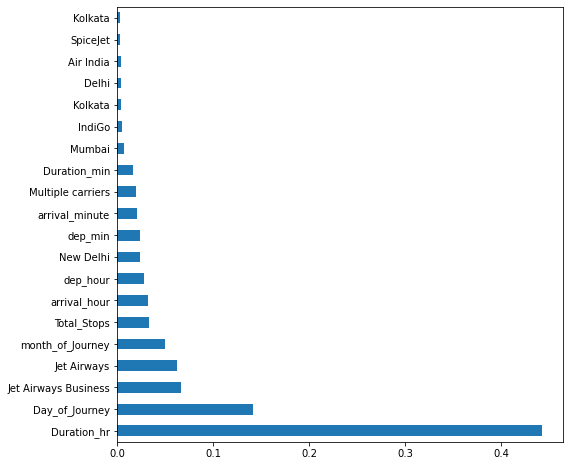

In [223]:
plt.figure(figsize=(8,8))
selection.nlargest(20).plot(kind="barh")

In [226]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=120)

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
model = RandomForestRegressor()

In [228]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [229]:
y_predict = model.predict(X_test)

In [232]:
model.score(X_train,y_train)

0.953916437962482

In [233]:
model.score(X_test,y_test)

0.8192998598020392

## Checking residual normality assumption

C:\Users\jagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

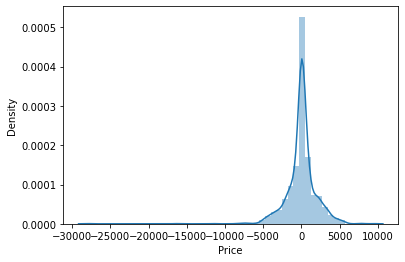

In [234]:
sns.distplot(y_predict - y_test)

C:\Users\jagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y_test')

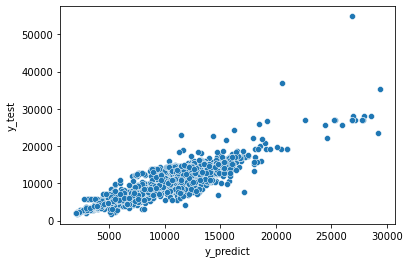

In [240]:
sns.scatterplot(y_predict,y_test)
plt.xlabel("y_predict")
plt.ylabel("y_test")


In [241]:
from sklearn import metrics

In [242]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print("r2_score:",metrics.r2_score(y_test,y_predict))

MAE:  1191.7502543524693
MSE:  3696318.3786472934
RMSE:  1922.5811760878378
r2_score: 0.8192998598020392


## Hyperparameter Tunning

In [245]:
from sklearn.model_selection import RandomizedSearchCV

In [246]:
# Randomized Search CV

## Number of trees in ramdom forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
## Number of features to consider at every split
max_features = ['auto']
## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
## Minimum number of samples required to split a node
min_samples_split = [10, 15, 100]



In [247]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [248]:
rscv=RandomizedSearchCV(estimator=model,param_distributions=random_grid,cv=5,verbose=10,scoring="neg_mean_squared_error",n_jobs=1)

In [250]:
rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 1/5; 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=-9205432.919 total time=   1.3s
[CV 2/5; 1/10] START max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 2/5; 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=-4312472.127 total time=   1.2s
[CV 3/5; 1/10] START max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 3/5; 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=-4178773.904 total time=   1.5s
[CV 4/5; 1/10] START max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 4/5; 1/10] END max_depth=10, max_feat

C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 2/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600;, score=-8156874.828 total time=   8.1s
[CV 2/5; 2/10] START max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 2/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600;, score=-3222259.235 total time=   5.6s
[CV 3/5; 2/10] START max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 2/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600;, score=-2806087.495 total time=   5.5s
[CV 4/5; 2/10] START max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 2/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600;, score=-3636767.830 total time=   6.0s
[CV 5/5; 2/10] START max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 2/10] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600;, score=-6246009.949 total time=   5.7s
[CV 1/5; 3/10] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800
[CV 1/5; 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=-13806860.003 total time=   1.1s
[CV 2/5; 3/10] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800
[CV 2/5; 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=-6758725.431 total time=   1.1s
[CV 3/5; 3/10] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800
[CV 3/5; 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=-7062483.710 total time=   1.1s
[CV 4/5; 3/10] START max_depth=5, max_features=sqrt, min_sample

C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 5/10] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100;, score=-11698306.539 total time=   5.2s
[CV 2/5; 5/10] START max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 5/10] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100;, score=-5415414.925 total time=   5.2s
[CV 3/5; 5/10] START max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 5/10] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100;, score=-5019573.695 total time=   5.4s
[CV 4/5; 5/10] START max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 5/10] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100;, score=-5804621.970 total time=   5.1s
[CV 5/5; 5/10] START max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 5/10] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100;, score=-8419639.608 total time=   5.1s
[CV 1/5; 6/10] START max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200
[CV 1/5; 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=-8039921.832 total time=   4.1s
[CV 2/5; 6/10] START max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200
[CV 2/5; 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=-3617411.154 total time=   4.0s
[CV 3/5; 6/10] START max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200
[CV 3/5; 6/10] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=-3285694.196 total time=   4.0s
[CV 4/5; 6/10] START max_depth=15, max_features=sqrt, min_

C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5; 7/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600;, score=-8218185.000 total time=   5.6s
[CV 2/5; 7/10] START max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5; 7/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600;, score=-3189665.783 total time=   5.7s
[CV 3/5; 7/10] START max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5; 7/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600;, score=-2809141.222 total time=   5.8s
[CV 4/5; 7/10] START max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5; 7/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600;, score=-3648401.304 total time=   6.3s
[CV 5/5; 7/10] START max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600


C:\Users\jagar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5; 7/10] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600;, score=-6223176.056 total time=   6.0s
[CV 1/5; 8/10] START max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700
[CV 1/5; 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700;, score=-8051790.207 total time=   1.7s
[CV 2/5; 8/10] START max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700
[CV 2/5; 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700;, score=-4325190.956 total time=   1.9s
[CV 3/5; 8/10] START max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700
[CV 3/5; 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700;, score=-4186570.615 total time=   1.7s
[CV 4/5; 8/10] START max_depth=10, max_features=sqrt, min_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=10)

In [254]:
rscv.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [256]:
y_predict2 = rscv.predict(X_test)

C:\Users\jagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

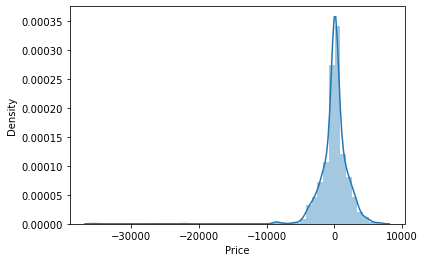

In [257]:
sns.distplot(y_predict2 - y_test)

C:\Users\jagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y_test')

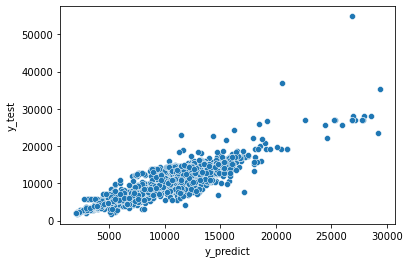

In [258]:
sns.scatterplot(y_predict,y_test)
plt.xlabel("y_predict")
plt.ylabel("y_test")

In [259]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict2))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict2))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict2)))
print("r2_score:",metrics.r2_score(y_test,y_predict2))

MAE:  1267.3112273973359
MSE:  4075492.4282907317
RMSE:  2018.7848890584485
r2_score: 0.8007633602608194


In [260]:
import pickle

In [261]:
file = open("Flight.pkl","wb")

In [262]:
pickle.dump(model,file)

In [263]:
model1 = pickle.load(open("Flight.pkl","rb"))

In [266]:
score =metrics.r2_score(y_test,model1.predict(X_test))

In [267]:
score

0.8192998598020392